# HomeWork 1

**DeadLine : 12:00 PM 7 Mehr 1399**

**Total points : 100pts**


Import some prerequisites

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

['/Users/pooya/Documents/University/Semester 7/Computer Vision/HW1',
 '/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python37.zip',
 '/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7',
 '/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/lib-dynload',
 '',
 '/Users/pooya/Library/Python/3.7/lib/python/site-packages',
 '/usr/local/lib/python3.7/site-packages',
 '/usr/local/lib/python3.7/site-packages/IPython/extensions',
 '/Users/pooya/.ipython']

Run this cell for plotting

In [3]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if gray:
            plt.imshow(img_list[i][0], cmap = 'gray')
        else:
            plt.imshow(img_list[i][0])
        plt.title(img_list[i][1])
        plt.xticks([])
        plt.yticks([])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

# PART 6A

Here is for your helper functions(optional)

In [27]:
def find_centers(image, n_circle, radius):
    
    height = image.shape[0]
    width = image.shape[1]

    h_center = height / 2
    w_center = width / 2

    segment_angle = 360 / n_circle
    print("segment angle is:", str(segment_angle))
    
    special_cases = [45, 135, 225, 315]
    
    center_points = []
    for i in range(n_circle):
        angle = i * segment_angle
        if angle in special_cases:
            w_val = w_center + radius * np.cos(np.deg2rad(angle - 5))
            h_val = h_center - radius * np.sin(np.deg2rad(angle - 5))
            center_points.append((int(w_val),int(h_val)))
            w_val = w_center + radius * np.cos(np.deg2rad(angle + 5))
            h_val = h_center - radius * np.sin(np.deg2rad(angle + 5))
            center_points.append((int(w_val),int(h_val)))
        else:
            angle = np.deg2rad(i * segment_angle)
            w_val = w_center + radius * np.cos(angle)
            h_val = h_center - radius * np.sin(angle)
            center_points.append((int(w_val),int(h_val)))
    return center_points

Implement this function so that creates an image like circles_t1.jpg and circles_t2.jpg in the images folder.


**Hint**
*:you only can use cv2.circle function from OpenCV*

In [32]:
def draw_circles(width, height, radius, color, thickness):
    '''
    Draws nested circles.

    Parameters:
        width (int): The width of result image.
        height (int): The height of result image.
        radius (int): The radius of circles.
        color (tuple): The color of circles in (b, g, r) mode.
        thickness (int): The thickness of circles.

    Returns:
        numpy.ndarray: The result image.
    '''
    
    image = np.zeros((height, width, 3), np.uint8) + 255 # creates blank image.
    centers = find_centers(image, 8, radius)
    print("Center Coordinates: ", centers)
    for center in centers:
        cv2.circle(image, center, radius, color, thickness)
    return image

Test your implementation (dont change this cell)

segment angle is: 45.0
Center Coordinates:  [(120, 50), (114, 35), (100, 30), (85, 35), (80, 50), (85, 64), (100, 70), (114, 64)]
segment angle is: 45.0
Center Coordinates:  [(120, 50), (114, 35), (100, 30), (85, 35), (80, 50), (85, 64), (100, 70), (114, 64)]


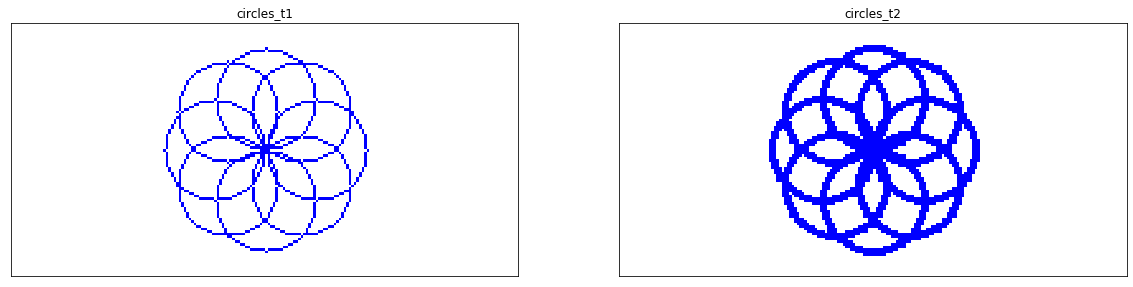

In [33]:
width = 200
height = 100
radius = 20
color = (0, 0, 255) # blue color in (r, g, b) mode

image_list = []
thickness = 1
image_list.append([draw_circles(width, height, radius, color, thickness), 'circles_t1'])
thickness = 2
image_list.append([draw_circles(width, height, radius, color, thickness), 'circles_t2'])
plotter(image_list, 1, 2, False, 20, 10, 'q6a')

# PART 6B

Here is for your helper functions(optional)

In [34]:
def segmentation(image, n_line):
    height = image.shape[0]
    width = image.shape[1]
    height_segment = height / n_line
    width_segment = width / n_line
    h_points = []
    w_points = []
    for i in range(n_line):
        h_points.append((int((i+1)*height_segment),0))
        w_points.append((0,int((i+1)*width_segment)))
    h_points.reverse()
    return (h_points, w_points)

Implement this function so that creates an image like lines.jpg in the images folder.


**Hint**
*:you only can use cv2.line function from OpenCV*

In [35]:
def draw_lines(width, height, color, thickness):
    '''
    Draws nested lines.

    Parameters:
        width (int): The width of result image.
        height (int): The height of result image.
        color (tuple): The color of lines in (b, g, r) mode.
        thickness (int): The thickness of lines.

    Returns:
        numpy.ndarray: The result image.
    '''
    
    image = np.zeros((height, width, 3), np.uint8) + 255 # creates blank image.
    h, w = segmentation(image, 50)
    for i in range(len(h)):
        cv2.line(image,h[i],w[i],color,thickness)
    return image

Test your implementation (dont change this cell)

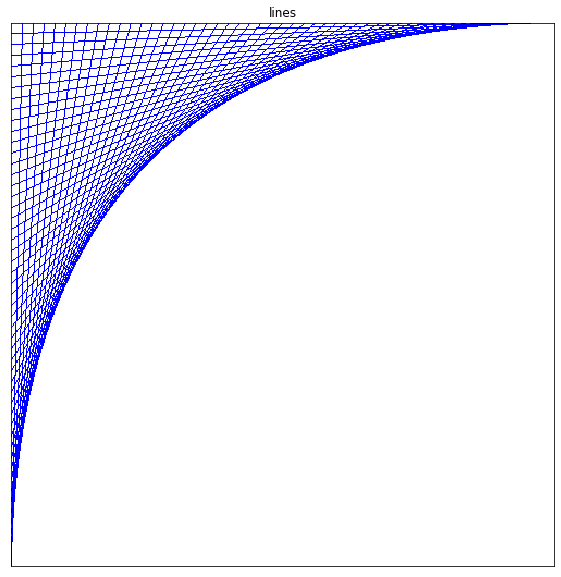

In [36]:
width = 500
height = 500
thickness = 1
color = (0, 0, 255) # blue color in (r, g, b) mode

image_list = []
image_list.append([draw_lines(width, height, color, thickness), 'lines'])
plotter(image_list, 1, 1, False, 20, 10, 'q6b')

for create proper files for sending in quera run this cell.

In [8]:
!python notebook_converter.py

End!!!